In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/test-woe/Test_WOE.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE



In [4]:
from sklearn import metrics

In [5]:
path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/df_WOE.csv'

In [6]:
df = pd.read_csv(path)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,-0.653578,-0.987308,0.346995,0.042559,-0.042225,-0.879049,-0.685078,-0.188350,0
1,0.991942,1.529823,0.065552,0.042559,-0.042225,0.701554,0.649822,0.668514,1
2,-0.653578,1.529823,-0.532753,0.042559,-0.042225,-0.879049,-0.685078,-0.188350,1
3,0.991942,1.529823,0.065552,0.042559,-0.042225,0.701554,0.649822,-0.188350,1
4,-0.653578,-0.987308,0.065552,0.042559,-0.042225,-0.879049,-0.685078,-0.188350,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    885 non-null    float64
 1   Sex       885 non-null    float64
 2   Age       885 non-null    float64
 3   SibSp     885 non-null    float64
 4   Parch     885 non-null    float64
 5   Fare      885 non-null    float64
 6   Cabin     885 non-null    float64
 7   Embarked  885 non-null    float64
 8   Survived  885 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 62.4 KB


In [8]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

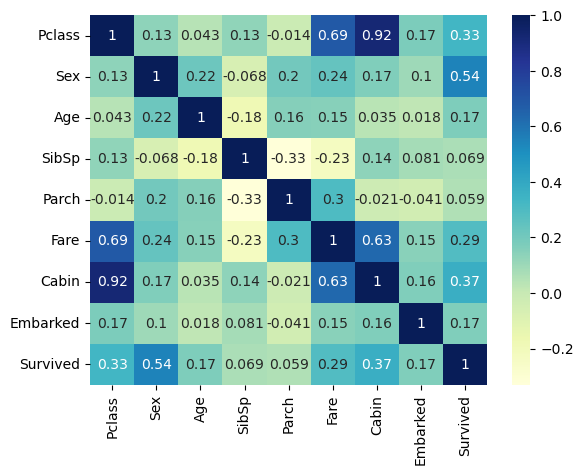

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [10]:
y = df['Survived']
X = df.drop('Survived', 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
len(y_test)/len(df)

0.2

In [13]:
lm = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  708
Model:                            GLM   Df Residuals:                      699
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.22
Date:                Thu, 27 Jul 2023   Deviance:                       618.44
Time:                        16:59:25   Pearson chi2:                     706.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3687
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4697      0.102     -4.603      0.000      -0.670      -0.270
Pclass        -0.1053      0.405     -0.260      0.795      -0.900       0.689
Sex            1.0477      0.088     11.889      0.000       0.875       1.220
Age            0.9967      0.302      3.304      0.001       0.405       1.588
SibSp          2.1978      0.783      2.807      0.005       0.663       3.732
Parch         -0.9510      0.922     -1.031      0.302      -2.759       0.857
Fare           0.1484      0.257      0.579      0.563      -0.354       0.651
Cabin          1.0275      0.350      2.934      0.003       0.341       1.714
Embarked       0.8875      0.310      2.859      0.004       0.279       1.496
==============================================================================
"""

In [14]:
#y_pred = lm.fit().predict(sm.add_constant(X_test))

In [15]:
def vif_fn(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [16]:
vif_fn(X_train)

,Features,VIF
0,Pclass,8.09
6,Cabin,7.08
5,Fare,2.73
3,SibSp,1.33
4,Parch,1.26
1,Sex,1.15
2,Age,1.09
7,Embarked,1.05


In [17]:
X_train = X_train.drop('Pclass', 1)

In [18]:
lm2 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
lm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  708
Model:                            GLM   Df Residuals:                      700
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.25
Date:                Thu, 27 Jul 2023   Deviance:                       618.51
Time:                        16:59:25   Pearson chi2:                     709.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3686
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4724      0.102     -4.653      0.000      -0.671      -0.273
Sex            1.0507      0.087     12.013      0.000       0.879       1.222
Age            0.9969      0.302      3.303      0.001       0.405       1.588
SibSp          2.1751      0.779      2.794      0.005       0.649       3.701
Parch         -0.9340      0.920     -1.015      0.310      -2.738       0.870
Fare           0.1234      0.238      0.519      0.604      -0.343       0.590
Cabin          0.9516      0.191      4.974      0.000       0.577       1.327
Embarked       0.8825      0.310      2.849      0.004       0.275       1.490
==============================================================================
"""

In [19]:
vif_fn(X_train)

,Features,VIF
4,Fare,2.35
5,Cabin,2.12
2,SibSp,1.30
3,Parch,1.25
0,Sex,1.13
1,Age,1.08
6,Embarked,1.05


In [20]:
X_train = X_train.drop('Parch', 1)

In [21]:
lm3 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
lm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  708
Model:                            GLM   Df Residuals:                      701
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.77
Date:                Thu, 27 Jul 2023   Deviance:                       619.53
Time:                        16:59:25   Pearson chi2:                     713.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4739      0.101     -4.673      0.000      -0.673      -0.275
Sex            1.0367      0.086     12.056      0.000       0.868       1.205
Age            0.9814      0.301      3.262      0.001       0.392       1.571
SibSp          2.2814      0.778      2.932      0.003       0.756       3.806
Fare           0.0457      0.225      0.203      0.839      -0.396       0.487
Cabin          0.9899      0.188      5.262      0.000       0.621       1.359
Embarked       0.8971      0.309      2.904      0.004       0.292       1.503
==============================================================================
"""

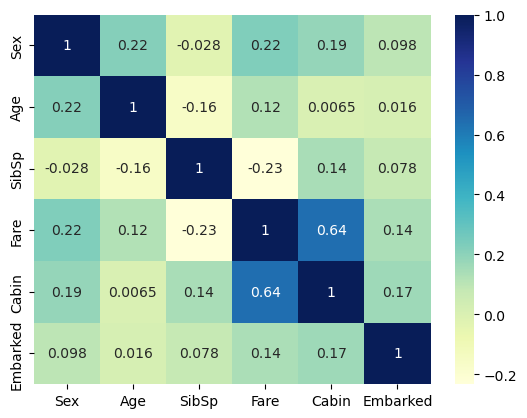

In [22]:
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [23]:
X_train = X_train.drop('Fare', 1)

In [24]:
lm4 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
lm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  708
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -309.79
Date:                Thu, 27 Jul 2023   Deviance:                       619.57
Time:                        16:59:26   Pearson chi2:                     714.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3677
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4739      0.101     -4.675      0.000      -0.673      -0.275
Sex            1.0389      0.085     12.165      0.000       0.872       1.206
Age            0.9829      0.301      3.270      0.001       0.394       1.572
SibSp          2.2289      0.735      3.034      0.002       0.789       3.669
Cabin          1.0158      0.139      7.329      0.000       0.744       1.287
Embarked       0.9027      0.308      2.934      0.003       0.300       1.506
==============================================================================
"""

In [25]:
col = X_train.columns

In [26]:
col

Index(['Sex', 'Age', 'SibSp', 'Cabin', 'Embarked'], dtype='object')

In [27]:
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred = logsk.predict(X_test[col])

In [29]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       113
           1       0.67      0.67      0.67        64

    accuracy                           0.76       177
   macro avg       0.74      0.74      0.74       177
weighted avg       0.76      0.76      0.76       177



In [30]:
metrics.confusion_matrix(y_test, y_pred)

array([[92, 21],
       [21, 43]])

In [31]:
metrics.roc_auc_score(y_test, y_pred)

0.7430171460176991

In [32]:
y_pred_prob = logsk.predict_proba(X_test[col])

In [33]:
y_pred_df = pd.DataFrame(y_pred_prob)
y_pred_df.head()

,0,1
0,0.312408,0.687592
1,0.876472,0.123528
2,0.470079,0.529921
3,0.876472,0.123528
4,0.846090,0.153910


In [34]:
y_pred_1 = y_pred_df.iloc[:,[1]]
y_pred_1.head()

,1
0,0.687592
1,0.123528
2,0.529921
3,0.123528
4,0.153910


In [35]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Survived
44,1
388,1
703,1
643,0
880,0


In [36]:
y_test_df['ID'] = y_test_df.index
y_test_df.head()

,Survived,ID
44,1,44
388,1,388
703,1,703
643,0,643
880,0,880


In [37]:
y_test_df = y_test_df.reset_index(drop=True)
y_test_df.head()

,Survived,ID
0,1,44
1,1,388
2,1,703
3,0,643
4,0,880


In [38]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)
y_pred_final.head()

,Survived,ID,1
0,1,44,0.687592
1,1,388,0.123528
2,1,703,0.529921
3,0,643,0.123528
4,0,880,0.153910


In [39]:
y_pred_final = y_pred_final.rename(columns={1:'Pred_Prob'})
y_pred_final = y_pred_final.reindex(['ID', 'Survived', 'Pred_Prob'],axis=1)
y_pred_final['Predicted'] = y_pred_final['Pred_Prob'].map(lambda x:1 if x>0.5 else 0)
y_pred_final.head()

,ID,Survived,Pred_Prob,Predicted
0,44,1,0.687592,1
1,388,1,0.123528,0
2,703,1,0.529921,1
3,643,0,0.123528,0
4,880,0,0.153910,0


In [40]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
num = [i/10 for i in range(1,10,1)]
for i in num:
    cm = metrics.confusion_matrix(y_pred_final['Survived'], y_pred_final['Pred_Prob'] > i)
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    sensi = cm[1,1] / (cm[1,1] + cm[1,0])
    speci = cm[0,0] / (cm[0,0] + cm[0,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.559322  0.921875  0.353982
0.2   0.2  0.694915  0.875000  0.592920
0.3   0.3  0.757062  0.796875  0.734513
0.4   0.4  0.751412  0.781250  0.734513
0.5   0.5  0.762712  0.671875  0.814159
0.6   0.6  0.768362  0.562500  0.884956
0.7   0.7  0.762712  0.453125  0.938053
0.8   0.8  0.734463  0.296875  0.982301
0.9   0.9  0.700565  0.187500  0.991150


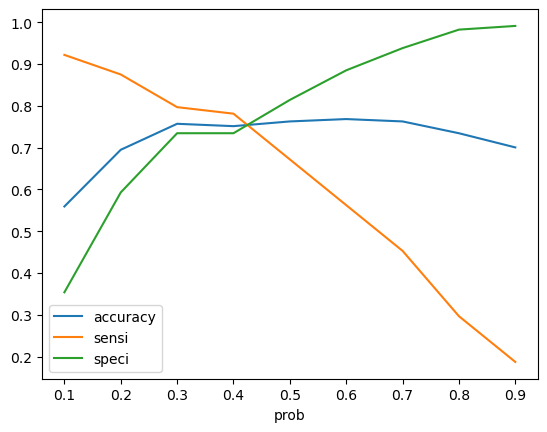

In [41]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], xticks = cutoff_df.prob)
plt.show()

In [42]:
# Probability cutoff point is 0.4

In [43]:
#Testing Test File

In [44]:
test = pd.read_csv('/kaggle/input/test-woe/Test_WOE.csv')
test.head()

,PassengerId,Sex,Age,SibSp,Cabin,Embarked
0,892,-0.987308,0.065552,0.042559,1.625627,0.037242
1,893,1.529823,0.065552,0.042559,1.625627,-0.188350
2,894,-0.987308,0.065552,0.042559,0.316293,0.037242
3,895,-0.987308,-0.532753,0.042559,1.625627,-0.188350
4,896,1.529823,0.346995,0.042559,1.625627,-0.188350


In [45]:
logsk = LogisticRegression()
logsk.fit(X[col], y)

LogisticRegression()

In [46]:
pred_prob = logsk.predict_proba(test[col])

In [47]:
pred_df = pd.DataFrame(pred_prob)
pred_df.head()

,0,1
0,0.430872,0.569128
1,0.063897,0.936103
2,0.741348,0.258652
3,0.553902,0.446098
4,0.054594,0.945406


In [48]:
pred_1 = pred_df.iloc[:,1]
pred_1_df = pd.DataFrame(pred_1)
pred_1_df.head()

,1
0,0.569128
1,0.936103
2,0.258652
3,0.446098
4,0.945406


In [49]:
test_pred = pd.concat([test['PassengerId'], pred_1_df], 1)
test_pred['Survived'] = test_pred.loc[:,1].map(lambda x:1 if x>0.6 else 0)
test_pred.head()

,PassengerId,1,Survived
0,892,0.569128,0
1,893,0.936103,1
2,894,0.258652,0
3,895,0.446098,0
4,896,0.945406,1


In [50]:
test_pred = test_pred.drop(1,axis=1)

In [51]:
test_pred.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [52]:
test_pred.to_csv('Logistic_Results_0.6_1.csv', index=False)